## Analisa Survey Peserta Paket Belajar ICS Cademy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

### Import Data Survey Peserta

In [2]:
data = pd.read_csv("survey_ics.csv")

#Setelah data diimport maka langkah selanjutnya di cek head

data.head()

,Timestamp,Asal Daerah,Status Pekerjaan,Rentang Umur,Darimana Anda Mendaftar Paket Belajar ICS ?,Paket Belajar Apakah yang anda Daftar Pertama kali?,Lebih Suka Mengisi Form dengan,Pada Pukul Berapa Anda Mendaftar Paket Belajar,"Apakah Perlu Ditambahkan Metode Pembayaran E-Wallet (Gopay, OVO, ShopeePay)",Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?
0,2/23/2023 15:09:23,DI Yogyakarta,Sudah Bekerja,24-35,Instagram,Paket Belajar PLC,Google Form,08.00 - 12.00,Ya,IIoT
1,2/23/2023 15:09:53,Jawa Tengah,Sudah Bekerja,24-35,Facebook,Paket Belajar PLC,Google Form,16.00 - 18.00,Ya,Paket scada yang lain
2,2/23/2023 15:09:54,Jabodetabek,Sudah Bekerja,24-35,Instagram,Paket Belajar PLC,Google Form,16.00 - 18.00,Tidak,weighing dengan hmi
3,2/23/2023 15:09:56,Jawa Barat,Mahasiswa atau Fresh Graduate,18-24,Instagram,Paket Belajar PLC,Google Form,16.00 - 18.00,Ya,Machine Learning untuk perbaikan mesin yang ka...
4,2/23/2023 15:10:18,Jawa Tengah,Sudah Bekerja,Lebih dari 35,Facebook,Paket Belajar PLC,Google Form,Diatas 20.00,Tidak,"Iiot, scada, plc"


Karena kita tidak perlu menggunakan kolom terakhir, yakni kolom saran tentang materi baru untuk bulan-bulan berikutnya, maka kita akan menghapus kolom tersebut

In [3]:
data = data.drop(['Timestamp'], axis=1)

#### Cek Ulang Data

In [4]:
data.head()

,Asal Daerah,Status Pekerjaan,Rentang Umur,Darimana Anda Mendaftar Paket Belajar ICS ?,Paket Belajar Apakah yang anda Daftar Pertama kali?,Lebih Suka Mengisi Form dengan,Pada Pukul Berapa Anda Mendaftar Paket Belajar,"Apakah Perlu Ditambahkan Metode Pembayaran E-Wallet (Gopay, OVO, ShopeePay)",Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?
0,DI Yogyakarta,Sudah Bekerja,24-35,Instagram,Paket Belajar PLC,Google Form,08.00 - 12.00,Ya,IIoT
1,Jawa Tengah,Sudah Bekerja,24-35,Facebook,Paket Belajar PLC,Google Form,16.00 - 18.00,Ya,Paket scada yang lain
2,Jabodetabek,Sudah Bekerja,24-35,Instagram,Paket Belajar PLC,Google Form,16.00 - 18.00,Tidak,weighing dengan hmi
3,Jawa Barat,Mahasiswa atau Fresh Graduate,18-24,Instagram,Paket Belajar PLC,Google Form,16.00 - 18.00,Ya,Machine Learning untuk perbaikan mesin yang ka...
4,Jawa Tengah,Sudah Bekerja,Lebih dari 35,Facebook,Paket Belajar PLC,Google Form,Diatas 20.00,Tidak,"Iiot, scada, plc"


#### Kita cek secara Deskriptif

In [5]:
#Dikarenakan semua kolom memiliki bentuk kategorikal maka kita akan menggunakan describe yang menggunakan np object
data.describe()

,Asal Daerah,Status Pekerjaan,Rentang Umur,Darimana Anda Mendaftar Paket Belajar ICS ?,Paket Belajar Apakah yang anda Daftar Pertama kali?,Lebih Suka Mengisi Form dengan,Pada Pukul Berapa Anda Mendaftar Paket Belajar,"Apakah Perlu Ditambahkan Metode Pembayaran E-Wallet (Gopay, OVO, ShopeePay)",Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?
count,219,219,219,219,219,219,219,219,219
unique,23,2,3,4,5,2,5,2,209
top,Jabodetabek,Sudah Bekerja,24-35,Instagram,Paket Belajar PLC,Google Form,18.00 - 20.00,Ya,DCS
freq,52,180,97,104,121,165,58,153,4


Dapat dilihat bahwa, dari survey ditemukan bahwa Peserta terbanyak berasal dari Daerah Jabodetabek, dengan status Sudah Bekerja, kemudian mempunyai rentang umur 24-35

### Visualisasi Beberapa Kategori

Frekuensi Relatif dari masing masing Kolom

In [6]:
data["Status Pekerjaan"].value_counts(normalize=True)

Status Pekerjaan
Sudah Bekerja                    0.821918
Mahasiswa atau Fresh Graduate    0.178082
Name: proportion, dtype: float64

In [7]:
data["Rentang Umur"].value_counts(normalize=True)

Rentang Umur
24-35            0.442922
Lebih dari 35    0.292237
18-24            0.264840
Name: proportion, dtype: float64

Karena rentetan data lebih sulit dibaca dan dipahami, maka akan kita buat visualisasi untuk beberapa kolom, agar diketahui nilai tertinggi dari masing-masing kategori

<Axes: xlabel='Darimana Anda Mendaftar Paket Belajar ICS ?', ylabel='count'>

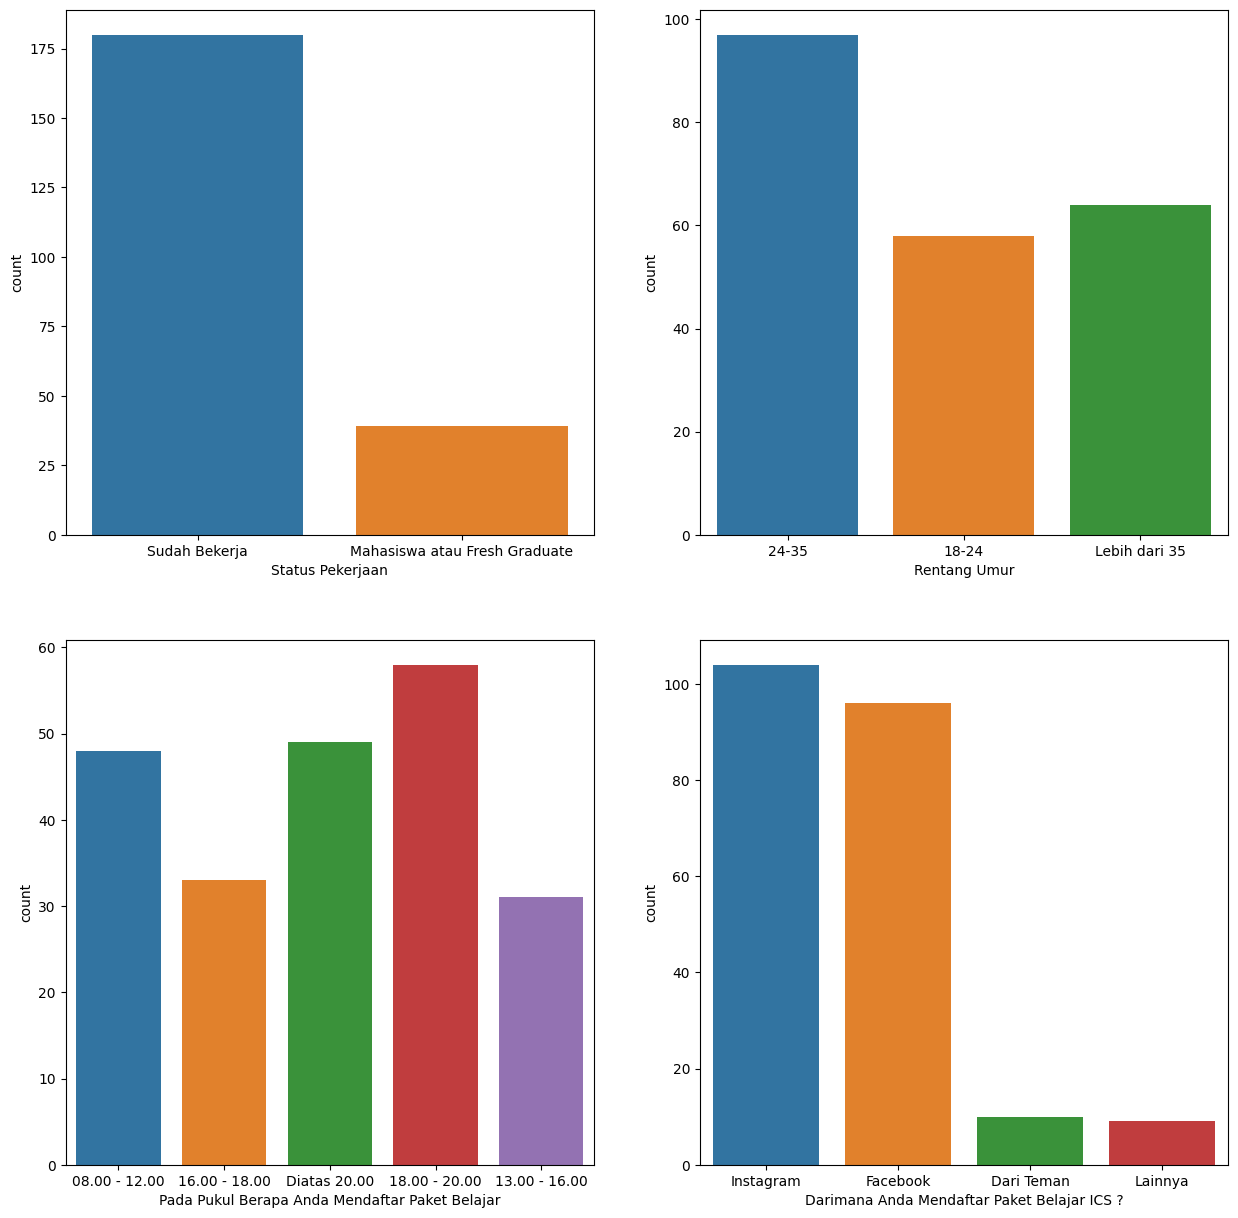

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(data=data, x="Status Pekerjaan", ax=axes[0,0])
sns.countplot(data=data, x="Rentang Umur", ax=axes[0,1])
sns.countplot(data=data, x="Pada Pukul Berapa Anda Mendaftar Paket Belajar", ax=axes[1,0])
sns.countplot(data=data, x="Darimana Anda Mendaftar Paket Belajar ICS ?", ax=axes[1,1])

### Kita cari hubungan antara penggunaan media sosial dan rentang umur menggunakan tabulasi silang

In [9]:
RT = pd.crosstab(data['Darimana Anda Mendaftar Paket Belajar ICS ?'], data['Rentang Umur'])
RT.iloc[1:3,:]

Rentang Umur,18-24,24-35,Lebih dari 35
Darimana Anda Mendaftar Paket Belajar ICS ?,,,
Facebook,7,42,47
Instagram,49,46,9


Dapat dilihat bahwa untuk penggunaan Sosial Media dipengaruhi oleh rentang Umur, disini kita tahu bahwa untuk umur 18-35 menggunakan sosial media Instagram, sedangkan untuk rentang umur diatas 35 menggunakan Facebook

In [10]:
JT = pd.crosstab(data['Darimana Anda Mendaftar Paket Belajar ICS ?'], data['Pada Pukul Berapa Anda Mendaftar Paket Belajar'])
# Kita ambil untuk dua sosial media yakni facebook dan instagram
JT.iloc[1:3,:]

Pada Pukul Berapa Anda Mendaftar Paket Belajar,08.00 - 12.00,13.00 - 16.00,16.00 - 18.00,18.00 - 20.00,Diatas 20.00
Darimana Anda Mendaftar Paket Belajar ICS ?,,,,,
Facebook,23,13,11,26,23
Instagram,17,17,21,28,21


<Axes: xlabel='Darimana Anda Mendaftar Paket Belajar ICS ?', ylabel='Count'>

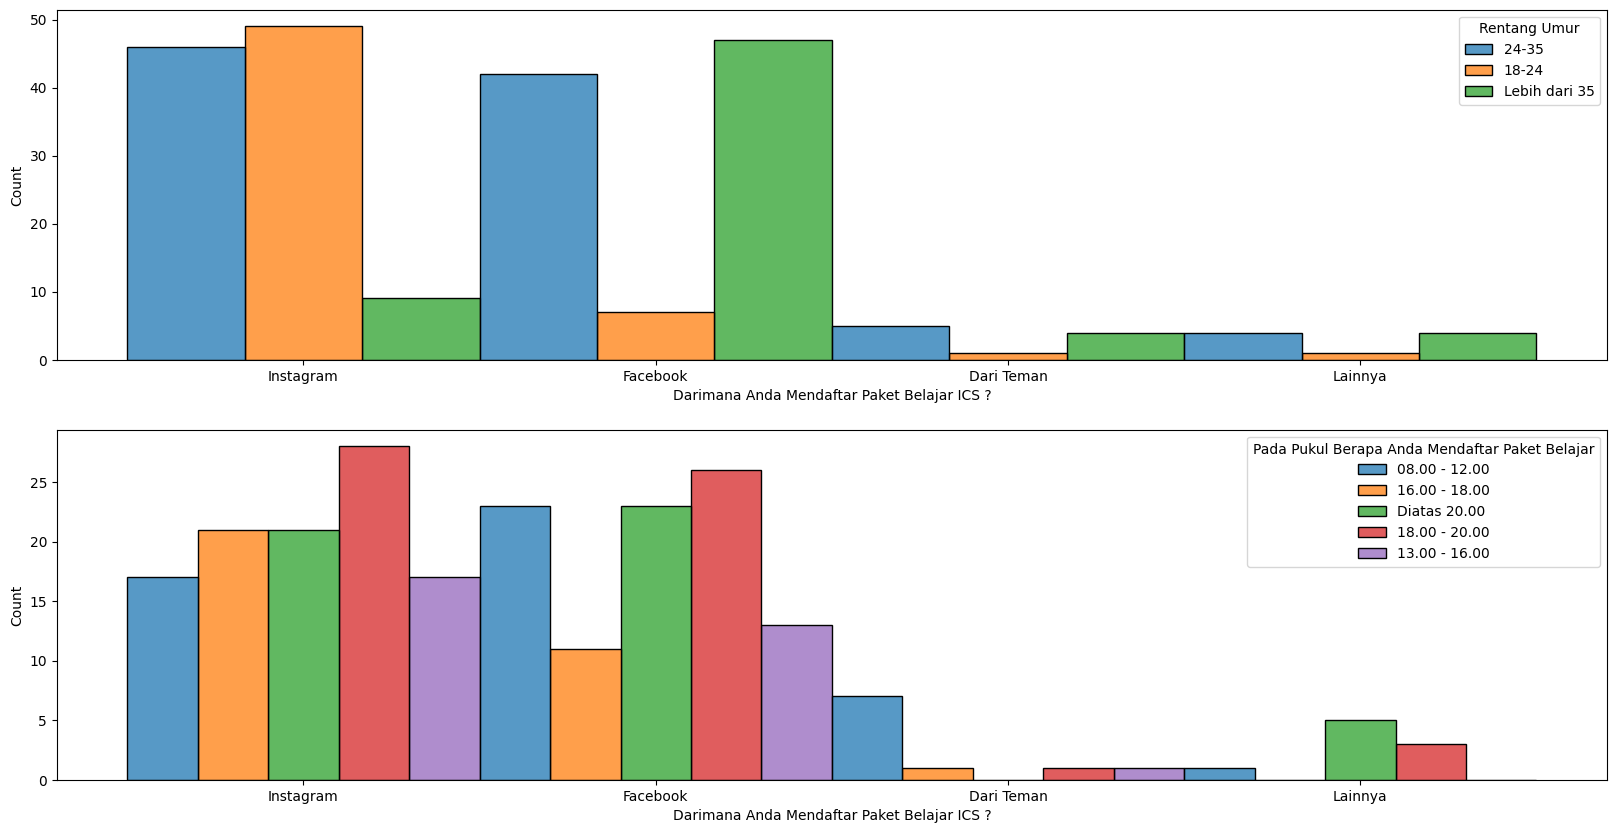

In [16]:
#Plot antara Rentang Umur dan Preferensi Form
fig, axes = plt.subplots(2, 1, figsize=(20,10))

sns.histplot(binwidth=0.5,
            x='Darimana Anda Mendaftar Paket Belajar ICS ?',
            hue='Rentang Umur',
            data=data,
            stat="count",
            multiple="dodge", ax=axes[0])

sns.histplot(binwidth=0.5,
            x='Darimana Anda Mendaftar Paket Belajar ICS ?',
            hue='Pada Pukul Berapa Anda Mendaftar Paket Belajar',
            data=data,
            stat="count",
            multiple="dodge", ax=axes[1])

### Mencari Hubungan antara dua variabel kategori dengan Chi Square Test

Untuk membuktikan adanya relasi antara dua variabel yang memiliki bentuk kategori, maka akan dilakukan Chi Square Test, disini kita memiliki dua hipotesis, dan tujuan kita adalah mengecek apakah Ada Relasi antara dua variabel (Menolak Hipotesis Null)

In [23]:
Hasil_Chi2_a = st.chi2_contingency(RT.iloc[1:3,:])
pd.DataFrame(Hasil_Chi2_a, index=["Statistic", "P Value","DOF", "Exp Freq"], columns=["Value"])

,Value
Statistic,57.239115
P Value,0.0
DOF,2
Exp Freq,"[[26.88, 42.24, 26.88], [29.12, 45.76, 29.12]]"


In [24]:
Hasil_Chi2_b = st.chi2_contingency(JT.iloc[1:3,:])
pd.DataFrame(Hasil_Chi2_b, index=["Statistic", "P Value","DOF", "Exp Freq"], columns=["Value"])

,Value
Statistic,4.410373
P Value,0.353308
DOF,4
Exp Freq,"[[19.2, 14.4, 15.36, 25.92, 21.12], [20.8, 15...."


### Mencari Topik Materi dengan *Request* Terbanyak

<Axes: xlabel='Request', ylabel='count'>

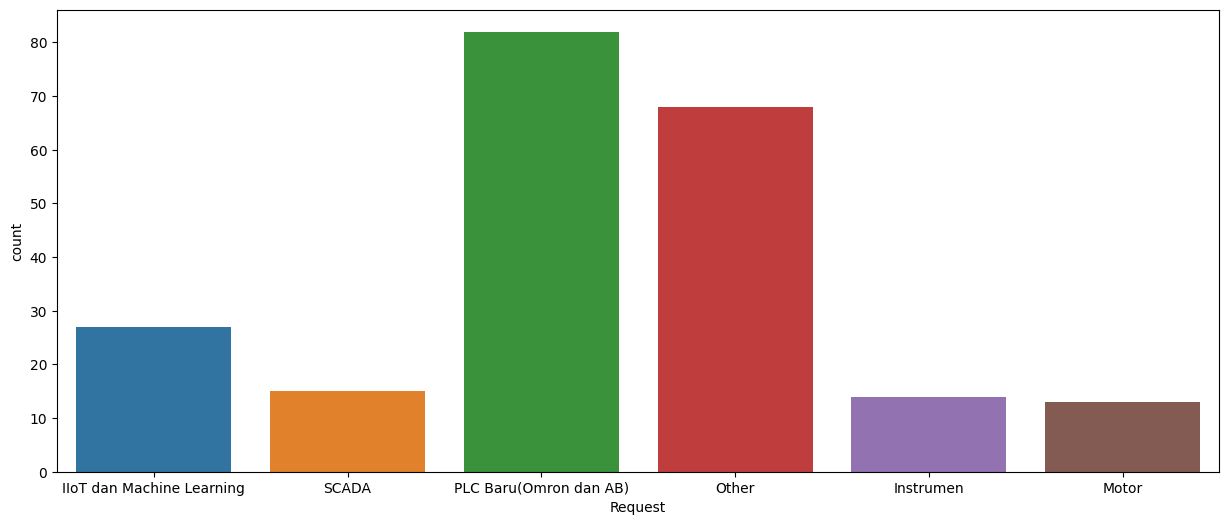

In [27]:

#Untuk mencari string yang kita inginkan, kita list kan terlebih dahulu keyword
request = ["IIoT dan Machine Learning", "PLC Baru(Omron dan AB)", "Motor","SCADA", "Instrumen"]

iiot = "IIOT|IOT|IoT|IIoT|iiot|iot|Arduino|Raspberry Pi|arduino|Modbus|modbus|web|Web|Machine Learning|ML|machine learning|ml|AI|Python|python"
AllenB = "PLC|plc|Plc|Omron|omron|DCS|Allen-Bradley|AB|Allen Bradley|allen bradley"
Motor = "Motor|Servo|Encoder|servo|motor|encoder|SERVO"
SCADA = "hmi|SCADA|scada|Scada|Hmi|HMI"
Instrumen = "Instrument|instrumen|Instrumen|sensor|Sensor|Penumatic|pneumatic|Listrik|Arus|arus|listrik|wiring|wire|Wiring"

kondisi = [(data['Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?'].str.contains(iiot)),
            (data['Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?'].str.contains(AllenB)),
            (data['Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?'].str.contains(Motor)),
            (data['Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?'].str.contains(SCADA)),
            (data['Materi Apa yang Diperlukan Selanjutnya Menurut Anda ?'].str.contains(Instrumen))]

data["Request"] = np.select(kondisi, request, default="Other")

#Kita visualisasi
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="Request")

## KESIMPULAN

Dari sini maka kita dapat mengambil beberapa kesimpulan dari proses analisa data diatas 

<ol>
<li>Yang pertama bahwa dari data yang didapat untuk rentang umur paling tinggi adalah 24-35 yang membuktikkan bahwa usia kerja muda dan freshgraduate mendominasi peserta Paket Belajar. Dengan daerha terbanyak ada di Jabodetabek.</li>
<li>Yang kedua untuk hubungan antara dua variabel, dapat disimpulkan adanya pengelompokan user dengan rentang umur tertentu untuk penggunaan media sosial. Dimana peserta umur diatas 35 mayoritas menggunakan Facebook sedangkan peserta rentang umur 18-24 mayoritas menggunakan Instagram. Dengan peserta umur 24-35 seimbang antara Facebook dan Instagram. Hal ini sangat oenting, agar saat campaign iklan untuk masing-masing platform dapat dikustomisasi berdasarkan umur pengguna</li>
<li>Yang ketiga dari hubungan antara penggunaan media sosial dan jam pendaftaran. Dapat disimpulkan bahwa baik Instagram dan Facebook memiliki waktu paling ramai saat pukul 18.00-20.00.</li>
<li>Yang terakhir bahwa </li>
</ol> 